In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'Washington D.C.': 'DC',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

data_types = {'FIPSST': object, 
              'FIPSCNTY': object, 
              'FIPS': object, 
              'HHI_Index': np.float64, 
              'pop_Penetration': np.float64, 
              'Eligibles': np.float64,
              'Enrolled': np.float64
             }

df = pd.read_csv('MA_time_series_by_county.csv', dtype= data_types, parse_dates=['date'])
df['HHI_Index'] = df['HHI_Index'].round(0)
df['year'] = df['date'].map(lambda x: x.year)
df['s_state'] = df['state'].replace(us_state_abbrev)

#removing any data for puerto rico and virgin islands.  They don't map easily.
df = df[~df['state'].isin(['Puerto Rico', 'Virgin Islands'])]

df.head()

,Unnamed: 0,state,county,FIPSST,FIPSCNTY,FIPS,Eligibles,Enrolled,date,pop_Penetration,y_fips,HHI_Index,5_pct_bonus,3.5_pct_bonus,0_pct_bonus,year,s_state
0,0,Alabama,Autauga,01,001,01001,9612.0,3049.0,2014-09-01,0.317208,2014-01001,2495.0,NaN,NaN,NaN,2014,AL
1,1,Alabama,Baldwin,01,003,01003,42730.0,13573.0,2014-09-01,0.317646,2014-01003,2061.0,NaN,NaN,NaN,2014,AL
2,2,Alabama,Barbour,01,005,01005,6097.0,896.0,2014-09-01,0.146958,2014-01005,5958.0,NaN,NaN,NaN,2014,AL
3,3,Alabama,Bibb,01,007,01007,4647.0,1690.0,2014-09-01,0.363675,2014-01007,2950.0,NaN,NaN,NaN,2014,AL
4,4,Alabama,Blount,01,009,01009,11385.0,4719.0,2014-09-01,0.414493,2014-01009,3087.0,NaN,NaN,NaN,2014,AL


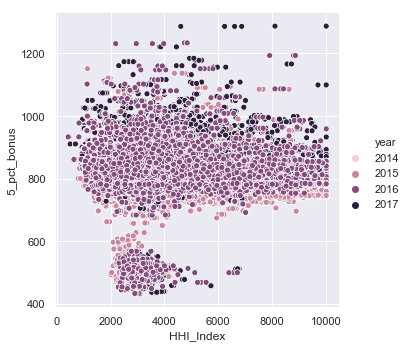

In [99]:
df2 = df[df['date'] == pd.to_datetime('12/1/2017')]
sns.relplot(x="HHI_Index", y="5_pct_bonus", hue='year', data=df);

In [77]:
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
plotly.tools.set_credentials_file(username='nflovejoy', api_key='57ld29nOStdQL2Nyykdj')


hhi = df[(df['date'] == pd.to_datetime('12/01/2017'))&(df['state'].isin(['California', 'Arizona', 'Nevada', 'Oregon', ' Idaho']))]
# hhi.info()

fig = ff.create_choropleth(
    fips=hhi['FIPS'], 
    values=hhi['pop_Penetration'],
    scope=['CA', 'AZ', 'Nevada', 'Oregon', ' Idaho'],
    binning_endpoints=[.1, .2, .3, .4, .5, .6],
    legend_title='Penetration by County', 
    title='California and Nearby States - Dec 2017'
    
)
py.iplot(fig, filename='Chloropleth of Market Competition, as measured by county penetration rates')

/Users/lovejoy/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [41]:
hhi = df[df['date'] == pd.to_datetime('12/01/2015')]
# hhi.info()

fig = ff.create_choropleth(
    fips=hhi['FIPS'], 
    values=hhi['HHI_Index'],
    binning_endpoints=[2000, 3000, 4000, 5000, 6000, 7000, 8000],
    legend_title='HHI by County', 
    title='United States - Dec 2015'
    
)
py.iplot(fig, filename='Chloropleth of Market Competition, as measure by HHI')

The draw time for this plot will be slow for all clients.


/Users/lovejoy/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long

/Users/lovejoy/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [75]:
pen = df[df['date'] == pd.to_datetime('12/01/2017')]
pen2 = pen.copy()
pen2['pop_Penetration'].fillna(0, inplace=True)
# pen2.info()

fig = ff.create_choropleth(
    fips=pen2['FIPS'], 
    values=pen2['pop_Penetration'],
    binning_endpoints=[.1, .2, .3, .4, .5, .6],
    legend_title='Market Penetration by County', 
    title='United States - Dec 2017'
    
)
py.iplot(fig, filename='Chloropleth of Market Competition, as measured by market penetration')

/Users/lovejoy/anaconda3/lib/python3.6/site-packages/plotly/figure_factory/_county_choropleth.py:772: UserWarning:

Unrecognized FIPS Values

Whoops! It looks like you are trying to pass at least one FIPS value that is not in our shapefile of FIPS and data for the counties. Your choropleth will still show up but these counties cannot be shown.
Unrecognized FIPS are: [2280]



The draw time for this plot will be slow for all clients.


/Users/lovejoy/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long

/Users/lovejoy/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



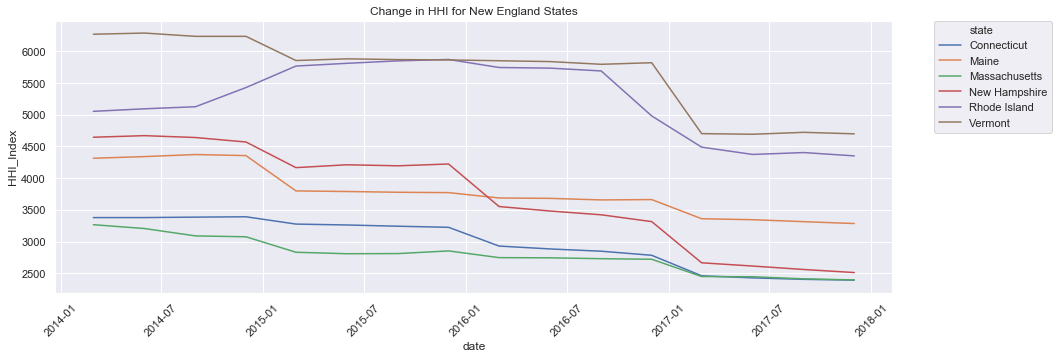

In [101]:
import seaborn as sns; sns.set()
NE_states = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont']

hhi_change = pd.DataFrame(df.groupby(['date','state'])['HHI_Index'].mean())
hhi_change.reset_index(inplace=True)


hhi_change2 = hhi_change[hhi_change['state'].isin(NE_states)]

ax = sns.lineplot(x="date", y="HHI_Index", hue="state", data=hhi_change2)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Change in HHI for New England States')
plt.xticks(rotation=45)
pass

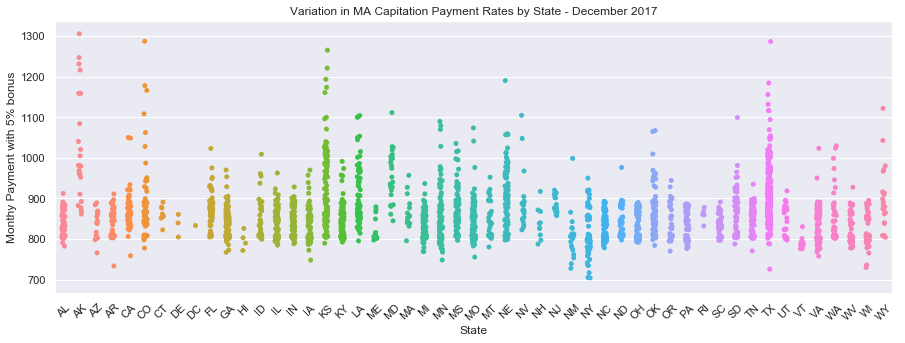

In [104]:
#Subset of data focused on december 2017
df_17 = df[df['date'] == pd.to_datetime('12/01/2017')]
# st_pay.groupby('state').date.count()

sns.stripplot(x="s_state", y="5_pct_bonus", data=df_17)
plt.xticks(rotation=45)
plt.ylabel('Monthy Payment with 5% bonus')
plt.xlabel('State')
plt.title('Variation in MA Capitation Payment Rates by State - December 2017')

pass

Text(0.5, 1.0, 'Relationship Between Market Penetration and Payment, by County')

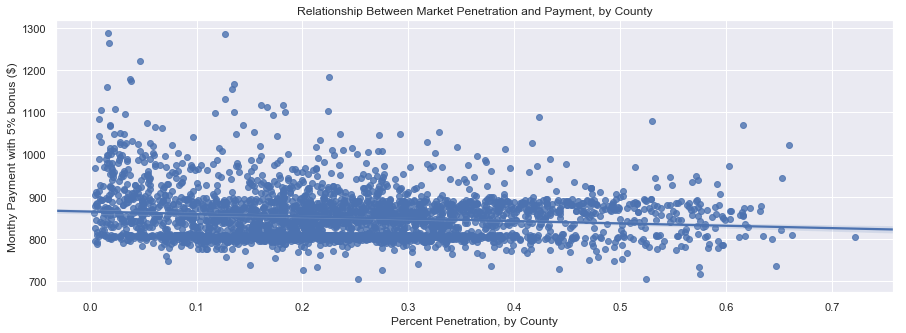

In [115]:
ax = sns.regplot(y="5_pct_bonus", x="pop_Penetration", data=df_17)
plt.ylabel('Monthy Payment with 5% bonus ($)')
plt.xlabel('Percent Penetration, by County')
plt.title('Relationship Between Market Penetration and Payment, by County')

# df_17.columns

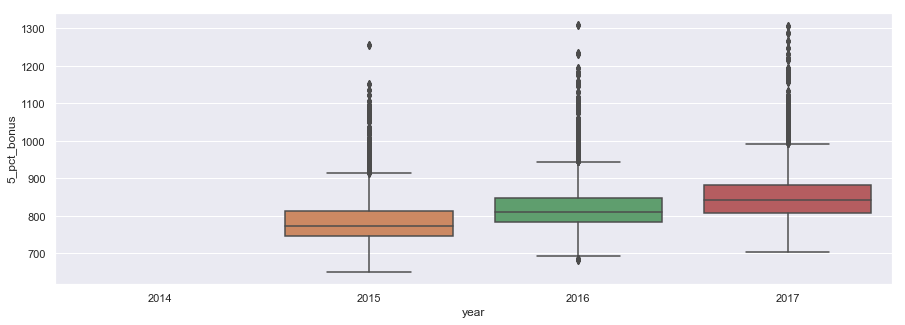

In [133]:
yr_pay = pd.DataFrame(df.groupby(['year'])['5_pct_bonus'].mean().reset_index())
yr_pay
# ax = sns.scatterplot(x="total_bill", y="tip", hue="time", style="time", data=tips

ax = sns.boxplot(y="5_pct_bonus", x="year", data=df)